In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from __init__ import *
from runner.svg2plan import run_new_layout
from new_solutions.selection import *
from domains.domain import Domain

import plotly.io as pio
pio.renderers.default = "browser"

from fixes.problem_types.side_hole_id2 import *
from visuals.plots import make_subplot_for_all_probs
from export.saver import read_layout, save_layout
from actions.details import Details
from helpers.shapely import shape_to_domain
from actions.interfaces import CurrentDomains




In [2]:
# report = run_new_layout()
# c = Cook(report)
# plot_general(c.history[0], "starting doma")
# make_subplot_for_all_probs(c.history[0], c.bl_hist)

In [3]:
ld: ResultsLog = read_layout("dining_squeeze_sidehole")
ld

node: dining, action: SQUEEZE, summary: Counter({'SIDE_HOLE': 1}), # unres probs: 1

In [4]:
plot_general(ld.layout.domains, "sidehole start")

In [5]:
ld_doms = ld.layout.domains
ld_doms

{'bedroom_1': Domain(bedroom_1, x=[0.00-3.22], y=[-2.80-0.00]),
 'kitchen': Domain(kitchen, x=[3.22-5.02], y=[-5.77--3.53]),
 'm_bath': Domain(m_bath, x=[4.82-7.14], y=[-1.30-0.00]),
 'm_bedroom': Domain(m_bedroom, x=[7.14-9.27], y=[-2.74-0.00]),
 'm_closet': Domain(m_closet, x=[8.20-9.20], y=[-3.34--2.74]),
 'bath': Domain(bath, x=[5.02-7.14], y=[-2.53--1.30]),
 'dining': Domain(dining, x=[5.02-7.14], y=[-5.68--2.53]),
 'transit_space': Domain(transit_space, x=[3.22-5.02], y=[-3.53--1.30]),
 'closet': Domain(closet, x=[8.38-9.38], y=[-5.75--3.34]),
 'bedroom_2': Domain(bedroom_2, x=[0.00-3.22], y=[-5.95--2.80]),
 'laundry': Domain(laundry, x=[3.22-4.82], y=[-1.30-0.45])}

In [6]:
ld.problem_being_addressed

Problem(index=2, problem_type=ProblemType.OVERLAP, resolved=False, nbs=('m_bedroom', 'dining')

In [7]:
re = Reporter(ld.layout)
re.run()

In [17]:
re.problems[0]

Problem(index=1, problem_type=ProblemType.SIDE_HOLE, resolved=False, nbs=['dining', 'closet']

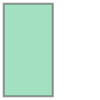

In [8]:
re.problems[0].geometry

In [11]:
pdom = shape_to_domain(re.problems[0].geometry, "problem")
pdom

Domain(problem, x=[7.14-8.38], y=[-5.68--3.34])

In [18]:
ld_doms["closet"]

Domain(closet, x=[8.38-9.38], y=[-5.75--3.34])

In [19]:
ld_doms["dining"]

Domain(dining, x=[5.02-7.14], y=[-5.68--2.53])

In [15]:
det = Details(CurrentDomains(ld_doms["closet"], pdom))
det.run()
det.result

[(Decimal('2.34'), <Direction.SOUTH: 1>),
 (Decimal('1.24'), <Direction.EAST: 2>)]

In [16]:
ld_doms["closet"]

Domain(closet, x=[8.38-9.38], y=[-5.75--3.34])